<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/14%EC%9E%A5_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#지도학습
#타깃변수(y)가 주어진 데이터를 학습하여 분류나 예측을 함

In [2]:
#14-1-1 의사결정나무
#데이터의 특성을 계층적으로 나눔
#직관적이며 해석가능

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#시각화 설정
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=111)

tree=DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=111)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print('test score:',tree.score(x_test,y_test))

test score: 0.9300699300699301


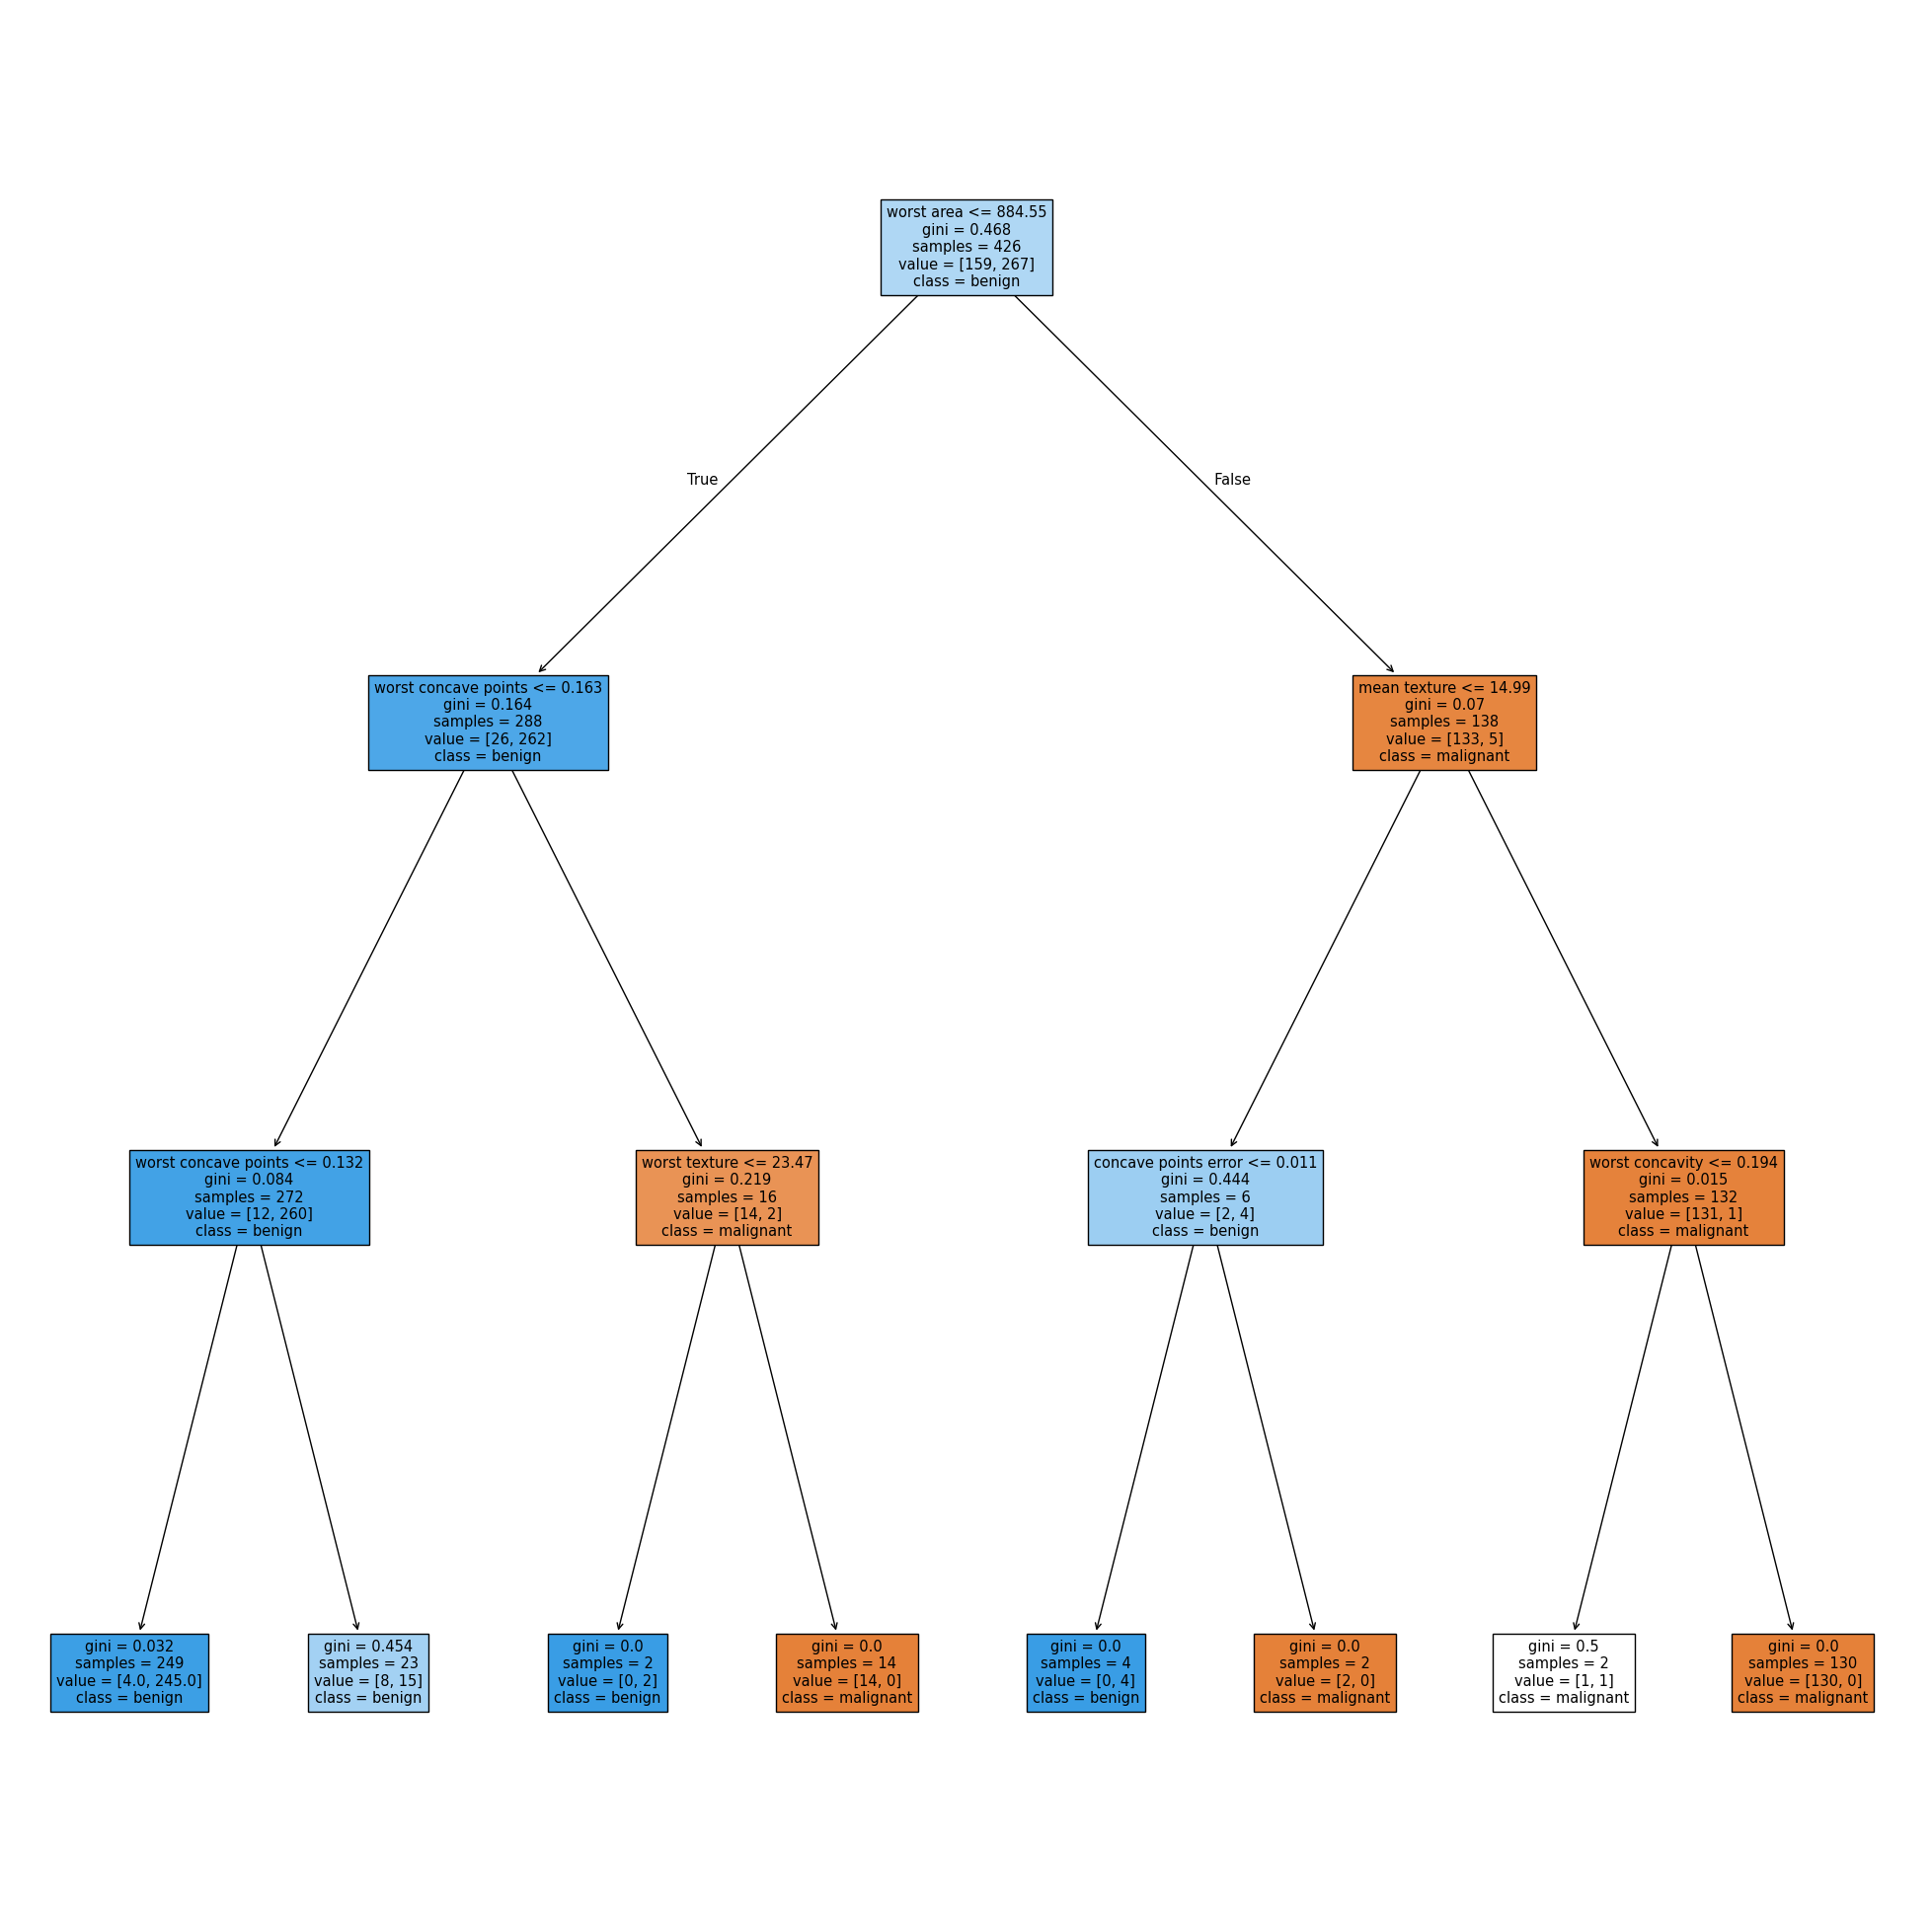

In [3]:
#결정트리 시각화
plt.figure(figsize=(25,25))
plot_tree(tree,class_names=cancer.target_names,feature_names=cancer.feature_names,filled=True)
plt.show()

In [4]:
#텍스트로 시각화
print(export_text(tree,feature_names=cancer.feature_names))

|--- worst area <= 884.55
|   |--- worst concave points <= 0.16
|   |   |--- worst concave points <= 0.13
|   |   |   |--- class: 1
|   |   |--- worst concave points >  0.13
|   |   |   |--- class: 1
|   |--- worst concave points >  0.16
|   |   |--- worst texture <= 23.47
|   |   |   |--- class: 1
|   |   |--- worst texture >  23.47
|   |   |   |--- class: 0
|--- worst area >  884.55
|   |--- mean texture <= 14.99
|   |   |--- concave points error <= 0.01
|   |   |   |--- class: 1
|   |   |--- concave points error >  0.01
|   |   |   |--- class: 0
|   |--- mean texture >  14.99
|   |   |--- worst concavity <= 0.19
|   |   |   |--- class: 0
|   |   |--- worst concavity >  0.19
|   |   |   |--- class: 0



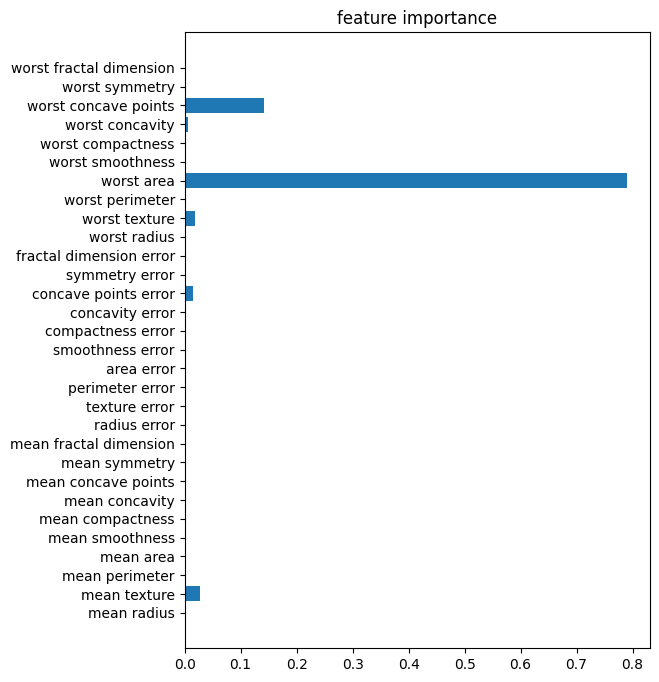

In [5]:
#중요도 시각화
plt.subplots(figsize=(6,8))
fi=tree.feature_importances_
fn=cancer.feature_names
plt.title('feature importance')
plt.barh(fn,fi)
plt.show()

In [6]:
#14-1-2 앙상블:여러 의사결정나무를 합한 결과
#배깅:중복을 허용한 랜덤샘플링>훈련세트생성

from sklearn.ensemble import BaggingClassifier

estimator=DecisionTreeClassifier(random_state=111)
bagging=BaggingClassifier(estimator,n_estimators=100,oob_score=True,random_state=111)
bagging.fit(x_train,y_train)
estimator.fit(x_train,y_train)

print('estimator score:',estimator.score(x_test,y_test))
print('test score:',bagging.score(x_test,y_test))
print('OOB score:',bagging.oob_score_)

estimator score: 0.951048951048951
test score: 0.965034965034965
OOB score: 0.960093896713615


test score: 0.972027972027972


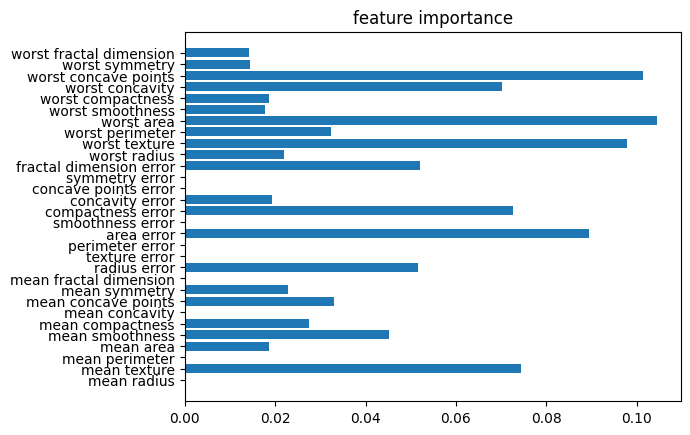

In [7]:
#부스팅:예측력이 나쁜 학습데이터에 가중치를 높임
#adaptive boosting(Adaboost), Gradient boosting, Stochastic gradient boosting

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=100)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
print('test score:',ada.score(x_test,y_test))

#특징 중요도
fi=ada.feature_importances_
fn=cancer.feature_names
plt.title('feature importance')
plt.barh(fn,fi)
plt.show()

test score: 0.972027972027972


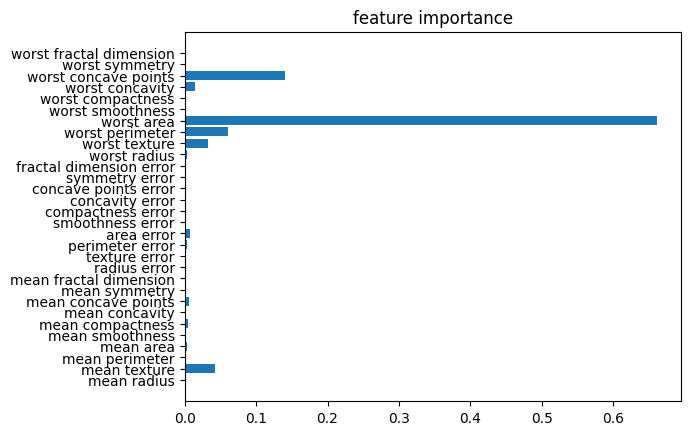

In [8]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=111)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print('test score:',gb.score(x_test,y_test))

#특징 중요도
fi=gb.feature_importances_
fn=cancer.feature_names
plt.title('feature importance')
plt.barh(fn,fi)
plt.show()

test score: 0.958041958041958


<BarContainer object of 30 artists>

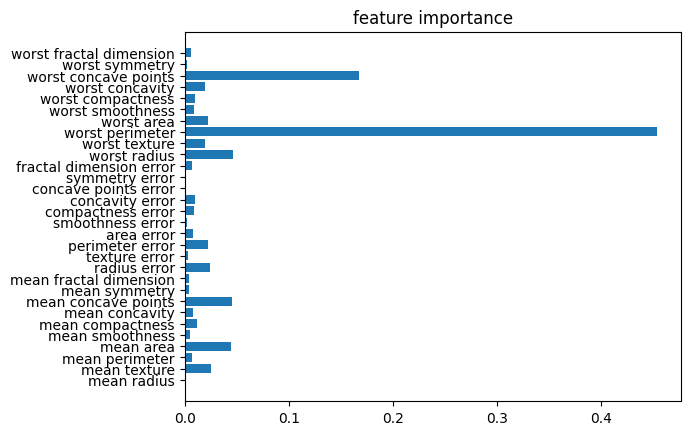

In [9]:
#XGBoost
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=111)
xg.fit(x_train,y_train)
xg_pred=xg.predict(x_test)
print('test score:',xg.score(x_test,y_test))

#특징 중요도
fi=xg.feature_importances_
fn=cancer.feature_names
plt.title('feature importance')
plt.barh(fn,fi)

test score: 0.965034965034965


<BarContainer object of 30 artists>

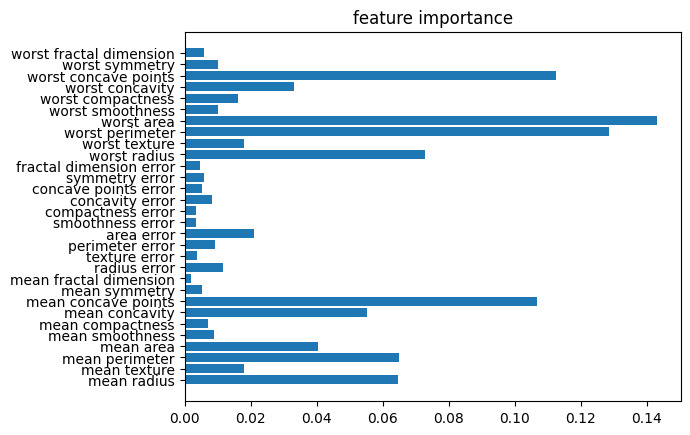

In [10]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('test score:',rf.score(x_test,y_test))

#특징 중요도
fi=rf.feature_importances_
fn=cancer.feature_names
plt.title('feature importance')
plt.barh(fn,fi)

test score: 0.965034965034965


<BarContainer object of 30 artists>

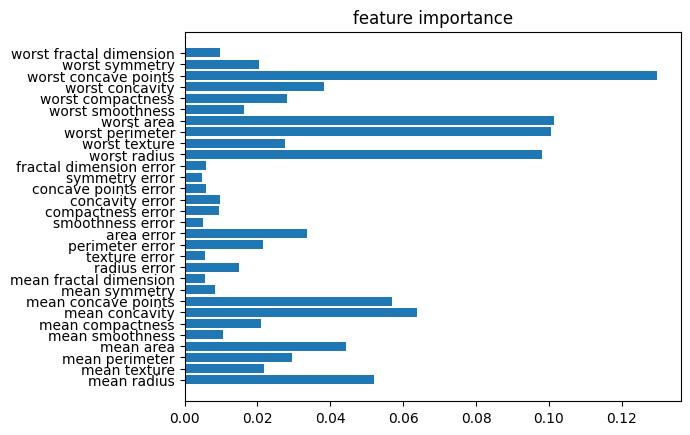

In [11]:
#extra-trees
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(random_state=100)
et.fit(x_train,y_train)
et_pred=et.predict(x_test)
print('test score:',et.score(x_test,y_test))

#특징 중요도
fi=et.feature_importances_
fn=cancer.feature_names
plt.title('feature importance')
plt.barh(fn,fi)

In [12]:
#스태킹과 보팅은 이후에 계속

In [13]:
#14-2 KNN(K-최근접이웃)
#유사한 학습 샘플 k개의 평균으로 계산
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('test score:',knn.score(x_test,y_test))

test score: 0.9300699300699301


In [20]:
#14-3 SVM(Support Vector Machine):최대마진 초평면 경계를 찾음, 커널 트릭으로 비선형 데이터 처리가능
from sklearn.svm import SVC
svm=SVC(kernel='rbf',gamma='auto',random_state=111,probability=True)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('test score:',svm.score(x_test,y_test))

test score: 0.6293706293706294


In [21]:
#스케일에 민감하기에 정규화가 필요하다
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_test_s=scaler.transform(x_test)
svm.fit(x_train_s,y_train)
svm_pred=svm.predict(x_test_s)
print('test score:',svm.score(x_test_s,y_test))

test score: 0.9790209790209791


In [28]:
#+보팅, 스태킹
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

voting=VotingClassifier(estimators=[('knn',knn),('svm',svm),('rf',rf)],voting='soft')
voting.fit(x_train_s,y_train)
voting_pred=voting.predict(x_test)
print('soft voting test score:',voting.score(x_test_s,y_test))

from sklearn.ensemble import StackingClassifier
stacking=StackingClassifier(estimators=[('knn',knn),('svm',svm),('rf',rf)],final_estimator=LogisticRegression())
stacking.fit(x_train_s,y_train)
stacking_pred=stacking.predict(x_test_s)
print('stacking test score:',stacking.score(x_test_s,y_test))

soft voting test score: 0.972027972027972
stacking test score: 0.986013986013986


In [23]:
#14-4 나이브 베이즈 분류:조건부 독립 가정에 따른 확률적 분류
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
print('test score:',nb.score(x_test,y_test))

test score: 0.9370629370629371


In [51]:
#14-5 인공 신경망(다층 레이어 퍼셉트론)
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(32,16,32),activation='relu',random_state=111)
#더 정교한 인공 신경망 모델은 텐서플로우로 구축
mlp.fit(x_train,y_train)
mlp_pred=mlp.predict(x_test)
print('test score:',mlp.score(x_test,y_test))

test score: 0.9230769230769231
